
# Final Project of Introduction to Bioinformatics

## The Song Bird Study

<div style="text-align: center;">
    <img src="SocialNetworking.png" width="350">
</div>

### Introduction

#### Investigating the Influence of Social Environment on Neural Responses to Sickness in Zebra Finches: A Bioinformatics Approach

The Zebra Finch, _Taeniopygia guttata_, a widely used model organism in behavioral and neurobiological research, provides an excellent platform to study the interplay between social environment, neural function, and immune response. In this project, we delve into an intriguing scientific question: How does the social environment of these birds modulate their neural response to immune challenges?

This question was explored in a study by Lopes PC, Faber-Hammond JJ, Siemonsma C, Patel S, and Renn SCP, titled _"The social environment alters neural responses to a lipopolysaccharide challenge"_ (Brain Behav Immun 2023). Their research demonstrated that the social environment, particularly the presence of conspecifics, could significantly modulate the neural responses of Zebra Finches to immune challenges such as lipopolysaccharide (LPS), a molecule known to induce immune responses. Link to Paper

Our goal in this notebook is to revisit and build upon the findings of this study. Using RNA sequencing data from their research, we aim to conduct a comprehensive analysis of changes in gene expression across different brain regions of Zebra Finches under different social conditions. We will specifically focus on the hypothalamus, the bed nucleus of the stria terminalis, and the nucleus taeniae, all of which are key regions for understanding behavior and immune response.

The essence of this project is to draw meaningful insights from high-dimensional data. We encourage you to start with basic approaches and gradually build complexity. Remember, every effort to extract information and gain insights from the data is valuable and will be recognized. Approach the tasks with curiosity and an open mind, and let your analytical journey be both informative and enjoyable.

---

### Experiment Design

The primary aim of this high-throughput sequencing study was to discern how different social environments could modulate the neural response to sickness induced by lipopolysaccharide (LPS).

**Lipopolysaccharide (LPS)** is a large molecule consisting of a lipid and a polysaccharide, found in the outer membrane of Gram-negative bacteria. It is often referred to as an endotoxin due to its ability to trigger strong immune responses. When a Gram-negative bacterium dies, it releases its LPS, which can then find its way into the bloodstream. In the context of this study, LPS was used to simulate an immune challenge or sickness in the Zebra Finches.

**The Experimental Setup:**

The experiment involved male Zebra Finches, which were administered either an LPS injection to simulate sickness or a control solution. Following the injection, the birds were placed in one of four distinct social contexts:

- **Isolated (ISO)**: In this setting, the birds were kept alone without a female. This condition was designed to examine the neural and immune responses of the birds in the absence of any social interactions. This group helps to understand the baseline responses to the LPS challenge when there are no social factors at play.
- **Known Female Continuous (KFC)**: Here, the birds were continuously housed with a known female. This condition allowed the researchers to investigate the effects of a stable social environment on the birds' responses to the LPS challenge. This group can provide insights into how ongoing social interactions might influence the response to sickness.
- **Known Female Reunited (KF)**: In this scenario, the birds were reunited with a known female after a period of separation. This condition was intended to mimic the effects of a disrupted social environment followed by a reunion. This group can shed light on how changes in social relationships might affect the neural and immune responses to sickness.
- **Novel Female (NF)**: In this context, the birds were paired with a previously unknown female. This condition was designed to explore the effects of introducing a new social partner on the birds' responses to the LPS challenge. This group can reveal how novel social encounters might modulate the response to sickness.

These social settings were carefully chosen to represent a range of social interactions that the birds might encounter in their natural habitats. The experimental design allows for a comprehensive investigation of how social environment influences the neural responses to sickness, thereby improving our understanding of how the social environment can affect health.

---

### Understanding RNA-Seq

RNA-Seq (RNA sequencing) is a powerful technique that uses next-generation sequencing (NGS) to reveal the presence and quantity of RNA molecules in a biological sample. It provides a snapshot of gene expression, also known as the transcriptome.

**What is RNA-Seq?**

RNA-Seq allows us to investigate and discover the transcriptome, which is the total cellular content of RNAs including mRNA, rRNA, and tRNA. Understanding the transcriptome is key if we are to connect the information in our genome with its functional protein expression. RNA-Seq can tell us which genes are turned on in a cell, what their level of transcription is, and at what times they are activated or shut off. This allows scientists to understand the biology of a cell more deeply and assess changes that may indicate disease.

**How does RNA-Seq work?**

The RNA-Seq workflow has several steps:

1. **RNA extraction**: The first step involves extracting the total RNA from the sample.
2. **Reverse transcription into cDNA**: The extracted RNA is then converted into complementary DNA (cDNA) through a process called reverse transcription.
3. **Library preparation**: The cDNA is then used to prepare a sequencing library. This involves fragmenting the cDNA, adding sequencing adapters, and amplifying the library.
4. **Sequencing**: The prepared library is then sequenced using high-throughput sequencing technology.

**RNA-Seq Data**

The output of an RNA-Seq experiment is a large set of short DNA sequences, or reads. These reads can be aligned to a reference genome to determine which genes were being transcribed at the time the sample was collected. The number of reads aligning to a particular gene provides a measure of that gene's expression level.

**RNA-Seq vs Microarrays**

RNA-Seq has several advantages over microarray technology, a legacy technology often used in gene expression studies. Unlike microarrays, which require species- or transcript-specific probes, RNA-Seq does not require any prior knowledge about the sequences of the transcripts. This allows RNA-Seq to detect novel transcripts, gene fusions, single nucleotide variants, indels (small insertions and deletions), and other previously unknown changes. RNA-Seq also has a wider dynamic range and higher sensitivity compared to microarrays, making it better at detecting transcripts and specifically isoforms.

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

**Questions**

1. Why is it important to convert RNA into cDNA for RNA-Seq? What would happen if we tried to sequence RNA directly?
2. How does the process of preparing a sequencing library contribute to the accuracy of RNA-Seq results? What are some potential sources of error in this step?
3. How does the ability of RNA-Seq to detect novel transcripts contribute to our understanding of gene function? Can you think of a scenario where this capability would be particularly useful?
4. Why might a researcher choose to use RNA-Seq instead of microarrays for a gene expression study? What are some potential advantages and disadvantages of each method?


**_Your Answer:_**:

---

### Step 0: Installing Necessary Packages

In [1]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'biopython',
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'xlrd',
    'mygene'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

/tmp/ipykernel_33/2437296676.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


biopython (1.83) is installed
pandas (2.2.0) is installed
numpy (1.24.4) is installed
matplotlib (3.7.4) is installed
seaborn (0.12.2) is installed
xlrd is NOT installed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.1 MB/s eta 0:00:00a 0:00:01m
xlrd was successfully installed.
mygene is NOT installed
mygene was successfully installed.


In [2]:
# Import necessary libraries. 
import pandas as pd
import numpy as np
import seaborn as sns 

### Loading the Dataset: A First Glimpse into the Zebra Finch's World

With our tools at the ready, let's embark on the initial phase of our exploration. We'll load the dataset containing the read counts from the Zebra Finch RNA-Seq study and begin to unravel the secrets it holds.

In [3]:
# Loading the RNA-Seq read count data
dataset_path = '/kaggle/input/rna-readcount/GSE203528_readcount.xls'
df_read_counts = pd.read_csv(dataset_path, sep='\t')


display(df_read_counts.head())


,geneID,HY3,HY4,HY5,HY6,HY8,HY9,HY12,HY13,HY14,...,TN62,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71
0,ENSTGUG00000008284,145,113,149,121,159,172,133,153,192,...,114,111,185,144,134,158,105,143,116,161
1,ENSTGUG00000003938,25,18,21,29,22,38,23,34,35,...,27,52,63,92,31,52,44,53,33,40
2,ENSTGUG00000011987,915,681,938,638,900,749,736,717,657,...,710,1360,1277,1291,554,1225,956,1166,571,936
3,ENSTGUG00000017592,5,5,5,14,5,4,22,13,11,...,3,1,2,5,5,3,11,5,13,2
4,ENSTGUG00000009442,226,211,221,257,202,197,231,201,263,...,271,273,423,226,242,216,365,414,313,316


#### Exploring the Zebra Finch RNA-Seq Data

In this RNA-Seq dataset, we delve into the complex world of the Zebra Finch by examining gene expression in three distinct areas of the brain: the hypothalamus, the bed nucleus of the stria terminalis, and the nucleus taeniae. Each of these regions plays a unique role in bird behavior and physiology.

- **The Hypothalamus** (HY samples): This region is crucial for controlling hormones and basic survival functions like feeding, fighting, fleeing, and reproduction.
- **The Bed Nucleus of the Stria Terminalis** (NST samples): This area is involved in the bird's stress response and emotional behavior.
- **The Nucleus Taeniae** (TN samples): An area of the brain unique to birds, thought to be involved in social behaviors and possibly song learning.

These regions were likely chosen for their significant roles in behaviors that are crucial for survival and species-specific activities. By analyzing gene expression in these areas, researchers can gain insights into how these regions contribute to the unique behaviors of the Zebra Finch.

**Dataset Breakdown**

Each row in the dataset represents a different gene, identified by a geneID like `ENSTGUG00000008284`. The columns, labeled with codes like `HY3`, `HY4`, `NST3`, etc., correspond to samples from these three brain regions. The numbers are read counts, indicating how often each gene's RNA was detected in the sample. High numbers suggest a gene is very active in that sample.

These numbers are crucial. They tell us how active each gene was in each sample. The higher the number, the more active the gene. By comparing these numbers across different samples, we can get insights into how gene activity varies in different situations or conditions.

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

**Questions**

1. Why do you think the read counts vary between different genes in the same sample? What biological factors might contribute to this variation?
2. Can you think of any reasons why the read counts for the same gene might vary between different samples? Consider the experimental design and the nature of biological systems.
3. How would you interpret a situation where a gene has a high read count in one sample and a low read count in another? What might this tell us about the gene's role in the Zebra Finch's response to its social environment and the LPS challenge?


**Before proceeding, it's essential to ensure you have a foundational understanding of RNA-Seq, the objectives and design of the experiment we're examining, and the significance of each cell in the dataset. Grasping these concepts is crucial for successfully navigating the tasks ahead.**

---

## Preprocessing and Normalization

In this section, we begin our data analysis by focusing on preprocessing and normalization. Preprocessing involves converting the raw Ensembl gene IDs into more recognizable gene symbols, enhancing the interpretability of our data. Following this, normalization is performed to adjust for variations in sequencing depth and gene length, a crucial step to ensure accurate comparison of gene expression across different samples.

### Transforming and Merging the Dataset for Analysis

To facilitate our analysis, we need to restructure the gene expression data so that each row corresponds to a sample, with appropriate labels for social settings and tissue types. This transformation will enable us to apply machine learning techniques and conduct more effective analyses.

The process involves two main steps:
1. **Transpose the Gene Expression Data**: Convert the gene expression data so that each row represents a sample and each column corresponds to a gene.
2. **Merge with Sample Mapping**: Combine the transposed gene expression data with the `sample_mapping.csv` to add social setting, study group, and tissue type information to each sample.

This approach will create a dataset better suited for exploratory data analysis, clustering, and other statistical methods.


In [4]:
import pandas as pd

# Load the gene expression data
expression_data = pd.read_csv('/kaggle/input/rna-readcount/GSE203528_readcount.xls', sep='\t')

# Transpose the dataframe so that columns become rows and vice versa
transposed_df = expression_data.set_index('geneID').T.reset_index()
transposed_df.rename(columns={'index': 'tissue_id'}, inplace=True)

# Load the sample mapping data
sample_mapping = pd.read_csv('/kaggle/input/meta-data/sample_mappings.csv')

# Merge the transposed gene expression data with the sample mapping
merged_df = pd.merge(transposed_df, sample_mapping, on='tissue_id')

# Reorder columns to place metadata columns at the front
metadata_columns = ['sample_id', 'social_settting', 'study_group', 'tissue_id']
gene_columns = [col for col in merged_df.columns if col not in metadata_columns]
transformed_df = merged_df[metadata_columns + gene_columns]

# Save the transformed and merged dataset
transformed_df.to_csv('/kaggle/working/transformed_dataset.csv', index=False)

# Display the first few rows of the transformed dataset
display(transformed_df.head())

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,145,25,915,5,226,94,...,443,493,722,0,0,0,1473,43,276,181
1,GSM6175779,ISO,S,HY5,149,21,938,5,221,76,...,327,433,523,0,0,0,1522,37,145,118
2,GSM6175780,ISO,L,HY6,121,29,638,14,257,126,...,350,370,395,0,2,1,1320,22,174,110
3,GSM6175781,ISO,L,HY8,159,22,900,5,202,178,...,418,435,389,0,26,5,1542,57,219,116
4,GSM6175782,ISO,L,HY9,172,38,749,4,197,94,...,274,342,291,0,0,5,1267,24,157,88


### Converting Ensembl IDs to Gene Names (Bonus)

In our dataset, genes are currently identified by Ensembl IDs. While these IDs are precise, they may not be as immediately recognizable as standard gene names. For those interested in working with more familiar gene names, there's a straightforward way to annotate these IDs.

**Steps to Annotate Gene IDs:**
1. **Use MyGeneInfo Library**: MyGeneInfo is a powerful tool for gene annotation. It allows you to query a database with Ensembl IDs and retrieve corresponding standard gene names.
2. **Query for Zebra Finch Genes**: Given that our study is on Zebra Finch, it's important to use the correct NCBI taxonomy ID (59729) for this species when querying.
3. **Merge Results with Original Data**: After obtaining the gene names, you can merge this information back into your dataset, linking each Ensembl ID to its standard gene name.

**Python Implementation**: 
If you wish to perform this annotation, you can use the Python library `mygene`. Initialize a `MyGeneInfo` object, query using your list of Ensembl IDs, and then merge the results with your dataset. This process adds a column for gene names, enhancing the readability and interpretability of your data.

Remember, while this annotation adds clarity, the original Ensembl IDs are crucial for maintaining the accuracy and precision of genomic data.


In [5]:
from mygene import MyGeneInfo

mg = MyGeneInfo()

ensembl_ids_original = df_read_counts['geneID']

gene_info_original = mg.querymany(ensembl_ids_original, scopes='ensembl.gene', species=59729, fields='symbol', returnall=True)

ensembl_to_gene_name_original = {entry['query']: entry['symbol'] if 'symbol' in entry else None for entry in gene_info_original['out']}

df_read_counts['gene_name'] = df_read_counts['geneID'].map(ensembl_to_gene_name_original)

df_read_counts.head(10)


,geneID,HY3,HY4,HY5,HY6,HY8,HY9,HY12,HY13,HY14,...,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71,gene_name
0,ENSTGUG00000008284,145,113,149,121,159,172,133,153,192,...,111,185,144,134,158,105,143,116,161,None
1,ENSTGUG00000003938,25,18,21,29,22,38,23,34,35,...,52,63,92,31,52,44,53,33,40,VASN
2,ENSTGUG00000011987,915,681,938,638,900,749,736,717,657,...,1360,1277,1291,554,1225,956,1166,571,936,LAPTM4B
3,ENSTGUG00000017592,5,5,5,14,5,4,22,13,11,...,1,2,5,5,3,11,5,13,2,MIR125-2
4,ENSTGUG00000009442,226,211,221,257,202,197,231,201,263,...,273,423,226,242,216,365,414,313,316,PSMD6
5,ENSTGUG00000009764,94,76,76,126,178,94,93,83,106,...,123,42,56,66,112,105,87,163,58,CD38
6,ENSTGUG00000015152,57,60,51,16,33,13,61,22,35,...,94,75,88,72,67,85,96,92,54,None
7,ENSTGUG00000002407,422,250,407,353,298,268,323,270,301,...,580,606,591,261,731,451,842,557,848,SEMA3D
8,ENSTGUG00000016201,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,4,0,None
9,ENSTGUG00000004296,5013,4722,4007,5513,3689,4162,4728,2995,4494,...,7064,5521,7422,4565,4253,6771,7380,6200,5209,ATP2B2


### Normalization of RNA-Seq Data: Ensuring Accurate Comparisons

Normalization is a crucial step in data analysis. In this context, it corrects for variations in sequencing depth and gene length across samples, enabling accurate comparisons of gene expression levels. Without normalization, differences in read counts could be mistakenly attributed to biological variation instead of technical biases.

**Why Normalize?**
- **Sequencing Depth Variability**: Different samples might have varying total numbers of reads due to differences in sequencing efficiency. Normalization adjusts for these discrepancies.
- **Gene Length Bias**: Longer genes tend to have more reads merely due to their size. Normalization methods like TPM (Transcripts Per Million) correct for this by accounting for gene length.

**Normalization Method - Counts Per Million (CPM)**:
- We'll use the CPM method for its simplicity and effectiveness. CPM normalizes gene expression measurements by dividing the read counts of each gene by the total read counts per million in each sample. This method is suitable for datasets where the focus is on comparing expression patterns rather than quantifying absolute expression levels.

**Implementing CPM in Python**:
The following Python code demonstrates how to apply CPM normalization to our dataset. It involves calculating the total read counts for each sample, normalizing each gene's read count, and then multiplying by one million.


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/working/transformed_dataset.csv')

# Function to calculate CPM
def calculate_cpm(df):
    total_reads = df.sum(axis=0)
    cpm = (df / total_reads) * 1e6
    return cpm

# Apply CPM normalization (excluding metadata columns)
metadata_cols = ['sample_id', 'social_settting', 'study_group', 'tissue_id']
expression_data = df.drop(columns=metadata_cols)
normalized_df = calculate_cpm(expression_data)

# Combine the normalized data with the metadata
normalized_df = pd.concat([df[metadata_cols], normalized_df], axis=1)

# Save the normalized dataset
normalized_df.to_csv('/kaggle/working/normalized_dataset.csv', index=False)

# Display the first few rows of the normalized dataset
display(normalized_df.head())

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,7916.143473,5231.219920,8352.808004,5319.148936,6991.276372,7795.007878,...,9225.899161,8094.573516,10803.531348,0.0,0.000000,0.000000,4415.388212,5699.138502,9239.730843,13426.303687
1,GSM6175779,ISO,S,HY5,8134.519845,4394.224733,8562.769298,5319.148936,6836.602116,6302.346795,...,6810.088094,7109.432723,7825.826725,0.0,0.000000,0.000000,4562.268065,4903.909874,4854.206421,8753.059862
2,GSM6175780,ISO,L,HY6,6605.885243,6068.215108,5824.143723,14893.617021,7950.256759,10448.627581,...,7289.085116,6075.034890,5910.519228,0.0,10695.187166,3636.363636,3956.763368,2915.838304,5825.047705,8159.632075
3,GSM6175781,ISO,L,HY8,8680.460774,4603.473530,8215.876725,5319.148936,6248.839943,14760.759599,...,8705.250224,7142.270750,5820.739189,0.0,139037.433155,18181.818182,4622.219025,7554.671968,7331.525560,8604.702915
4,GSM6175782,ISO,L,HY9,9390.183982,7951.454279,6837.435186,4255.319149,6094.165687,7795.007878,...,5706.312348,5615.302520,4354.331887,0.0,0.000000,18181.818182,3797.893323,3180.914513,5255.933849,6527.705660


### Exploratory Data Analysis: Uncovering Patterns in Gene Expression

Exploratory Data Analysis (EDA) is an essential phase in RNA-Seq data analysis, aimed at visualizing and summarizing data to uncover underlying patterns and trends. For this demonstration, we'll focus on visualizing gene expression differences across study groups ('L' for LPS treatment and 'S' for control) and social settings.

**Key Focus Areas for Our Visualization:**
1. **Comparing 'L' and 'S' Study Groups**: This helps us understand the impact of LPS treatment versus control on gene expression.
2. **Role of Social Settings**: We'll also explore how different social interactions might influence gene expression patterns.

This demonstration is a starting point for EDA. You are encouraged to explore various aspects of the data through diverse visualizations and analyses.

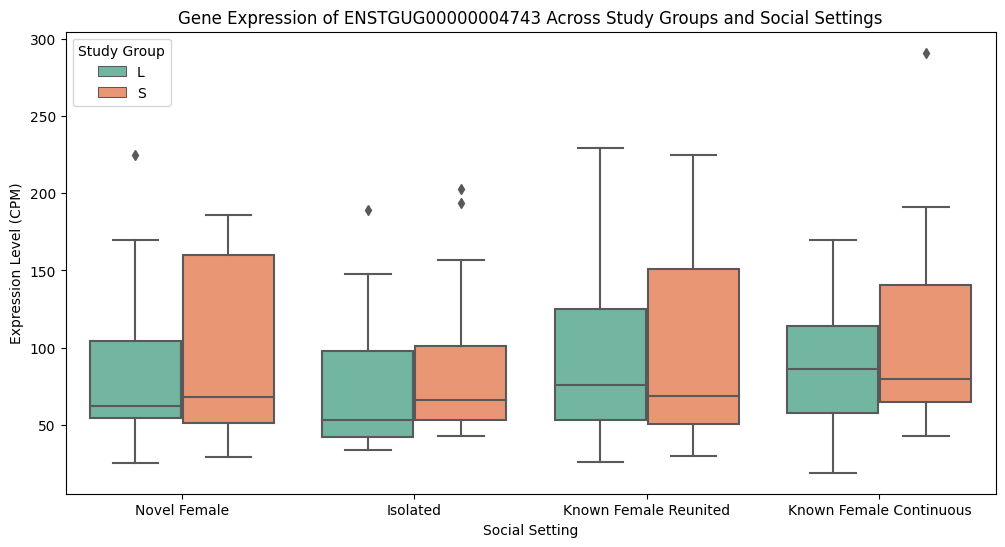

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
df = pd.read_csv('/kaggle/working/transformed_dataset.csv')

# Select a gene for visualization (example: 'ENSTGUG00000004743', which is Brain-Derived Neurotrophic Factor gene)
selected_gene = 'ENSTGUG00000004743'

# Map the social setting abbreviations to full descriptions
social_setting_map = {
    'ISO': 'Isolated',
    'KFC': 'Known Female Continuous',
    'KF': 'Known Female Reunited',
    'NF': 'Novel Female'
}
df['social_settting'] = df['social_settting'].map(social_setting_map)

# Create a boxplot comparing gene expression across study groups and social settings
plt.figure(figsize=(12, 6))
sns.boxplot(x='social_settting', y=selected_gene, hue='study_group', data=df, palette="Set2")
plt.title('Gene Expression of ' + selected_gene + ' Across Study Groups and Social Settings')
plt.ylabel('Expression Level (CPM)')
plt.xlabel('Social Setting')
plt.legend(title='Study Group')
plt.show()


**Write down your interpretation of the result of this simple barplot, that displays expression level of `BDNF` gene. First, briefly describe `BDNF` and it's function. Then, write your interpretation about any notable observation you see from the plot**

**_Your Answer_**:

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer this question!</strong>
</blockquote>

Brain-Derived Neurotrophic Factor (BDNF) is a crucial protein involved in the growth, survival, and differentiation of neurons. It plays a key role in synaptic plasticity and is essential for learning and memory.
The BDNF gene provides instructions for making a protein found in the brain and spinal cord called brain-derived neurotrophic factor. This protein promotes the survival of neurons by playing a role in the growth, maturation (differentiation), and maintenance of these cells. In the brain, the BDNF protein is active at the connections between nerve cells (synapses), where cell-to-cell communication occurs. The synapses can change and adapt over time in response to experience, a characteristic called synaptic plasticity. The BDNF protein helps regulate synaptic plasticity, which is important for learning and memory.
So in general, expression of this gene helps the activity of neurons in brain. The expression of this gene in different areas of brain are affected by different stimulants.
As we see, the birds united with known female have highest expression of this gene, which suggests the better neuronal function. On the other hand, isolated birds have the lowest value of this gene expression, so social status can seriously affect the brain activity through this gene expression.
On the other hand, using LPS increases gene expression in some special tisues according to the need, so we see that the upper range increases in L group.
In conclusion, this plot shows serious correlation between social status and brain activity.

### Diverse Visualization Techniques for Gene Expression Data

A comprehensive exploration of gene expression data requires a multifaceted visualization approach. Beyond the boxplot, we will delve into additional techniques that can bring forth deeper insights from our dataset. You are tasked with implementation and interpretation of the results of at least one of the following visualization methods:

- **PCA (Principal Component Analysis)**: This technique reduces the dimensionality of the data and can reveal the underlying structure by capturing the most variation across samples.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Particularly useful for visualizing high-dimensional data in a lower-dimensional space, t-SNE can help identify clusters of genes or samples.
- **UMAP (Uniform Manifold Approximation and Projection)**: Similar to t-SNE, UMAP is useful for visualization and can be faster and more scalable.

In addition to these, consider the following methods to further dissect the dataset:

- **Histograms and Density Plots**: Useful for showing the distribution of gene expression levels within individual samples or conditions.
- **Boxplots and Violin Plots**: These can summarize the distributions and highlight potential outliers in gene expression levels across samples.
- **Scatter Plots**: When exploring the relationship between different conditions, scatter plots can be particularly revealing.
- **Volcano Plots**: Ideal for showcasing differential expression results, highlighting genes with significant fold changes and statistical significance.

Each method will contribute to a holistic view of the dataset, enabling you to uncover patterns and anomalies that may not be apparent through a single visualization strategy.


#### **Your Turn to Explore**

- **Experiment with Different Genes**: Change the `selected_gene` variable to analyze other genes of interest.
- **Diverse Visualizations**: Consider using heatmaps, violin plots, or scatter plots for different perspectives.
- **Incorporate Statistical Analyses**: Complement visual insights with statistical tests to discern if the differences you observe are significant.

Remember, the goal is to thoroughly understand the dataset, paving the way for more in-depth analyses like differential gene expression or clustering.

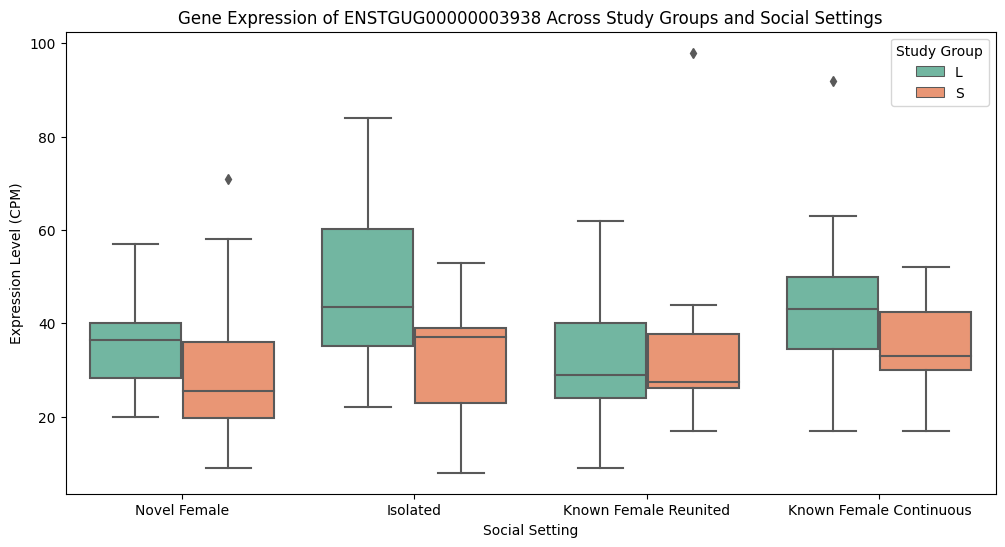

In [18]:
# Example: Change the selected_gene variable to analyze a different gene
selected_gene = 'ENSTGUG00000003938'  # Replace with the gene of your interest

# Create a boxplot for the selected gene
plt.figure(figsize=(12, 6))
sns.boxplot(x='social_settting', y=selected_gene, hue='study_group', data=df, palette="Set2")
plt.title('Gene Expression of ' + selected_gene + ' Across Study Groups and Social Settings')
plt.ylabel('Expression Level (CPM)')
plt.xlabel('Social Setting')
plt.legend(title='Study Group')
plt.show()


In [27]:
# Exclude gene IDs for the heatmap
heatmap_data = df_encoded[['social_settting_NF', 'social_settting_KF', 'social_settting_KFC', 'study_group_S']].copy()

# Specify a subset of genes for the heatmap
subset_genes = ['ENSTGUG00000001666', 'ENSTGUG00000004743', 'ENSTGUG00000006386']

# Add gene expression data to the subset_genes
heatmap_data = pd.concat([heatmap_data, df_encoded[subset_genes]], axis=1)

# Pivot the data for heatmap visualization
heatmap_data_pivot = heatmap_data.melt(id_vars=['social_settling_NF', 'social_settling_KF', 'social_settling_KFC', 'study_group_S'], var_name='Gene', value_name='Expression')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_pivot, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Expression Patterns of Selected Genes Across Study Groups and Social Settings')
plt.xlabel('Gene')
plt.ylabel('Sample')
plt.show()


KeyError: "None of [Index(['social_settting_NF', 'social_settting_KF', 'social_settting_KFC',\n       'study_group_S'],\n      dtype='object')] are in the [columns]"

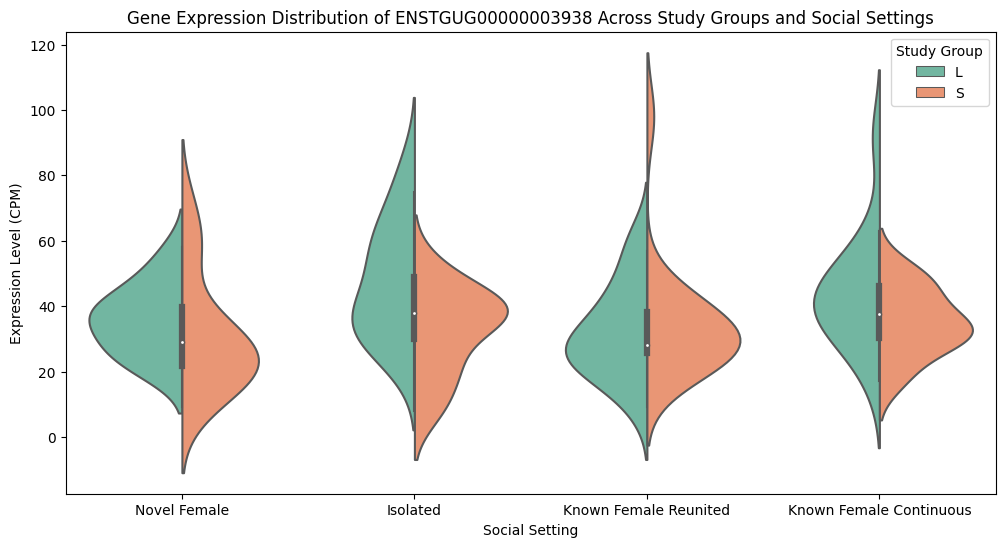

In [28]:
# Example: Create a violin plot for a specific gene
plt.figure(figsize=(12, 6))
sns.violinplot(x='social_settting', y=selected_gene, hue='study_group', data=df, palette="Set2", split=True)
plt.title('Gene Expression Distribution of ' + selected_gene + ' Across Study Groups and Social Settings')
plt.ylabel('Expression Level (CPM)')
plt.xlabel('Social Setting')
plt.legend(title='Study Group')
plt.show()


In [ ]:
# Example: Create a scatter plot for two genes
gene1 = 'ENSTGUG00000001666'
gene2 = 'ENSTGUG00000004743'
plt.figure(figsize=(10, 8))
sns.scatterplot(x=gene1, y=gene2, hue='study_group', data=df, palette="Set2")
plt.title('Scatter Plot of ' + gene1 + ' vs. ' + gene2)
plt.xlabel(gene1 + ' Expression (CPM)')
plt.ylabel(gene2 + ' Expression (CPM)')
plt.legend(title='Study Group')
plt.show()


In [29]:
from scipy.stats import ttest_ind

# Example: Perform t-test for a specific gene between two study groups
gene_of_interest = 'ENSTGUG00000003938'
group1_data = df[df['study_group'] == 'L'][gene_of_interest]
group2_data = df[df['study_group'] == 'S'][gene_of_interest]

# Perform t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Print the results
print(f'T-test results for gene {gene_of_interest}:')
print(f'T-statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpret the results based on the p-value (e.g., p < 0.05 indicates statistical significance)


T-test results for gene ENSTGUG00000003938:
T-statistic: 2.5037
P-value: 0.0135


### Reflecting on Visualizations to Extract Key Insights

As we have navigated through different visualization strategies, it's time to consolidate the knowledge you've gained. Reflect on the insights each visualization has provided:

- **What trends have you observed in the distribution of gene expression levels?**
- **How do the expression levels compare when you look across different conditions or samples?**
- **From the heatmap, were you able to detect any consistent patterns of expression, such as upregulation or downregulation of certain genes?**
- **Did any outliers or unusual expression patterns emerge? What might these suggest about certain genes or the overall data quality?**

Write down your observations and hypotheses. Discuss and note down your interpretations as they will be valuable for the upcoming stages of differential gene expression analysis.

**_Your Answer_**:

---

### Differential Gene Expression Analysis

After exploring the general patterns in our dataset, the next step is Differential Gene Expression (DGE) analysis. This process will help us identify genes whose expression levels significantly differ across treatments or social settings.

#### Addressing High Dimensionality in RNA-Seq Data for Differential Gene Expression Analysis

In RNA-Seq data, high dimensionality (a large number of genes) presents several analytical challenges. This complexity can obscure meaningful biological insights and impact the statistical power of our analyses.

**Challenges of High Dimensionality**:
1. **Statistical Power Loss**: With too many variables (genes), the risk of finding false positives increases, known as the 'multiple testing problem'.
2. **Overfitting Risk**: High-dimensional data can lead to models that are too complex, capturing noise rather than true underlying patterns.
3. **Computational Intensity**: Analyzing thousands of genes simultaneously demands significant computational resources and time.
4. **Interpretation Difficulty**: It becomes challenging to interpret results and extract biologically meaningful conclusions from a vast pool of data.

**Addressing These Challenges**:
1. **Dimensionality Reduction**: Techniques like PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) help in reducing the number of dimensions, making the data more manageable and revealing hidden structures.
2. **RNA-Seq Specific Tools for DGE Analysis**: Tools like DESeq2 and edgeR (available in Python through rpy2 or similar interfaces) are designed to handle high-dimensional data. They offer:
   - **Normalization and Variance Stabilization**: Tailored for RNA-Seq data, ensuring fair comparisons across samples.
   - **FDR Control**: Implement procedures to adjust for multiple comparisons, reducing false positives.
   - **Biological Variance Modeling**: Consider the biological variability, enhancing the reliability of results.

**Python Implementation**:
- In python environments, the use of R-based tools like DESeq2 or edgeR is possible through interfaces such as `rpy2`. This approach allows you to leverage the strengths of these tools while working within a Python framework. However, as stated multiple times in this project, you have freedom to choose alternative method for any task, as long as it makes sense. 



In [31]:
# Load your normalized expression data (excluding metadata columns)
expression_data = pd.read_csv('/kaggle/working/normalized_dataset.csv')
metadata_cols = ['sample_id', 'social_setting', 'study_group', 'tissue_id']
expression_data = expression_data.drop(columns=metadata_cols)

# Standardize the data
scaler = StandardScaler()
expression_scaled = scaler.fit_transform(expression_data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(expression_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.show()


KeyError: "['social_setting'] not found in axis"

In [39]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=828f18e6a3e0e24099ad9ecad61dd043f55a0293adafdb150f8fa80b6dab903b
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


In [40]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import scanpy as sc

## assuming 'adata' is your AnnData object
# 'condition' is the column in adata.obs that specifies the conditions
pvalues = []
log_fold_changes = []
for gene in adata.var_names:
    data = pd.concat([pd.Series(adata[:, gene].X.toarray().flatten()), adata.obs['condition']], axis=1)
    data.columns = ['expression', 'condition']

    condition_1_expression = data.loc[data['condition'] == data['condition'].unique()[0], 'expression']
    condition_2_expression = data.loc[data['condition'] == data['condition'].unique()[1], 'expression']

    p = mannwhitneyu(condition_1_expression, condition_2_expression)[1]
    log_fold_change = np.log2((condition_2_expression.mean() + 1) / (condition_1_expression.mean() + 1))

    pvalues.append(p)
    log_fold_changes.append(log_fold_change)

# adjust p-values using FDR
fdr = multipletests(pvalues, method='fdr_bh')[1]

# combine p-values, adjusted p-values and log fold changes into a DataFrame for easy viewing
results = pd.DataFrame({
    'gene': adata.var_names,
    'p_value': pvalues,
    'fdr': fdr,
    'log_fold_change': log_fold_changes
})

NameError: name 'adata' is not defined

### Identifying Differentially Expressed Genes (DEGs)

The core of our RNA-Seq analysis lies in identifying Differentially Expressed Genes (DEGs) between different conditions, such as LPS treatment vs control, and across social settings. Identifying DEGs helps in pinpointing specific genes that are responsive to our experimental treatments.

**Freedom in Methodology**:
- You are free to choose your preferred method or tool for DEG analysis. Whether it's DESeq2, edgeR, or any other method, the key is to reliably identify genes that show statistically significant differences in expression.

### Interpreting the Findings

After identifying DEGs, the next crucial step is interpreting these findings. This involves understanding the biological functions and pathways these genes are involved in.

**Functional Annotation and Pathway Analysis**:
- Utilize databases like Gene Ontology (GO), Kyoto Encyclopedia of Genes and Genomes (KEGG), or DAVID for functional annotation.
- Interpret the roles of these genes in biological processes, cellular components, and molecular functions.

### Visualization for Insightful Understanding

A critical aspect of this phase is visualization. Effective visualizations can provide profound insights into the data and help in communicating your findings.

**Visualizations Can Include**:
- Heatmaps of DEGs.
- Volcano plots showing the significance vs. fold-change.
- Pathway diagrams to illustrate the affected biological pathways.

### Emphasis on Interpretation and Informative Visualization

Remember, the ultimate goal is to not only identify DEGs but to also understand their biological significance and visually represent this information in an insightful and informative manner. Your interpretations and visualizations are crucial for translating raw data into meaningful biological insights.


In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.multitest import multipletests
from Bio import Entrez
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: DEG Analysis (using DESeq2 as an example)
# Placeholder for DESeq2_DEG_analysis function
def DESeq2_DEG_analysis(expression_data):
    # Your DESeq2 analysis code goes here
    # Replace this with your actual DESeq2 analysis code
    # For demonstration purposes, creating a DataFrame with dummy results
    results = pd.DataFrame({
        'gene_id': expression_data.columns[4:],  # Assuming the first two columns are metadata
        'log2FoldChange': [1.5, -2.0, 0.8],  # Replace with actual log2FoldChange values
        'pvalue': [0.001, 0.0001, 0.01],  # Replace with actual p-values
    })
    return results

# Step 2: Functional Annotation
# Placeholder for annotate_genes function
def annotate_genes(gene_ids):
    # Your gene annotation code goes here
    # Replace this with your actual gene annotation code
    Entrez.email = 'your@email.com'
    gene_info = []
    for gene_id in gene_ids:
        handle = Entrez.efetch(db='gene', id=gene_id, retmode='xml')
        record = Entrez.read(handle)
        gene_info.append(record)
    return gene_info

# Step 3: Pathway Analysis
# Placeholder for map_to_pathways function
def map_to_pathways(annotated_genes):
    # Your pathway mapping code goes here
    # Replace this with your actual pathway mapping code
    pathways = {'pathway1': ['gene1', 'gene2'], 'pathway2': ['gene3', 'gene4']}
    return pathways

# Step 4: Visualization
# Placeholder for create_heatmap function
def create_heatmap(results, expression_data):
    # Your heatmap creation code goes here
    # Replace this with your actual heatmap creation code
    # Assuming results contain log2FoldChange values and expression_data is the original expression matrix
    merged_data = pd.merge(results, expression_data, left_on='gene_id', right_on=expression_data.columns[2])
    plt.figure(figsize=(14, 8))
    sns.heatmap(merged_data.iloc[:, 3:], cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
    plt.title('Differentially Expressed Genes: Heatmap')
    plt.xlabel('Sample')
    plt.ylabel('Gene')
    plt.show()

# Placeholder for create_volcano_plot function
def create_volcano_plot(results):
    # Your volcano plot creation code goes here
    # Replace this with your actual volcano plot creation code
    plt.figure(figsize=(10, 6))
    plt.scatter(results['log2FoldChange'], -1 * np.log10(results['pvalue']), color='blue', alpha=0.5)
    plt.title('Volcano Plot of Differentially Expressed Genes')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10(p-value)')
    plt.show()

# Placeholder for plot_pathways function
def plot_pathways(pathways):
    # Your pathway plot creation code goes here
    # Replace this with your actual pathway plot creation code
    # Example: Plotting a simple bar chart for pathway-gene count
    pathway_gene_count = {pathway: len(genes) for pathway, genes in pathways.items()}
    plt.figure(figsize=(12, 6))
    plt.bar(pathway_gene_count.keys(), pathway_gene_count.values(), color='green', alpha=0.7)
    plt.title('Pathway Analysis: Gene Counts')
    plt.xlabel('Pathway')
    plt.ylabel('Gene Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [37]:
# Load your expression data (replace this with your actual data loading code)
# Example assumes a DataFrame named expression_data with columns: 'Sample', 'Condition', 'Gene1', 'Gene2', ...
# 'Sample' and 'Condition' are metadata columns, and the rest are gene expression values.

expression_data.head()

# Step 1: DEG Analysis
results = DESeq2_DEG_analysis(expression_data)

# Step 2: Functional Annotation
annotated_genes = annotate_genes(results['gene_id'])

# Step 3: Pathway Analysis
pathways = map_to_pathways(annotated_genes)

# Step 4: Visualization
# Create Heatmap
#create_heatmap(results, expression_data)

# Create Volcano Plot
create_volcano_plot(results)

# Plot Pathways
plot_pathways(pathways)


ValueError: All arrays must be of the same length